In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../versions/keypoints_xy.csv')

In [19]:
df.head()

,label,keypoints
0,A,"[(0.577608585357666, 0.5037515759468079), (0.6..."
1,A,"[(0.3596232831478119, 0.8418118357658386), (0...."
2,A,"[(0.6453518271446228, 0.5408987998962402), (0...."
3,A,"[(0.703693151473999, 0.8905668258666992), (0.7..."
4,A,"[(0.3583056330680847, 0.737202525138855), (0.4..."


In [20]:
df['keypoints'] = df['keypoints'].apply(eval)
# df['keypoints'] = df['keypoints'].apply(lambda x: [list(val[:2]) for val in x])
df.head()

,label,keypoints
0,A,"[(0.577608585357666, 0.5037515759468079), (0.6..."
1,A,"[(0.3596232831478119, 0.8418118357658386), (0...."
2,A,"[(0.6453518271446228, 0.5408987998962402), (0...."
3,A,"[(0.703693151473999, 0.8905668258666992), (0.7..."
4,A,"[(0.3583056330680847, 0.737202525138855), (0.4..."


In [21]:
def calculate_features_from_wrist(hand_landmarks):

    wrist = np.array([hand_landmarks[0][0], hand_landmarks[0][1]])
    angles = []
    distances = []

    # Calculate angles based on 2D projection and distances in 3D
    for i in range(1, len(hand_landmarks)):
        keypoint = np.array([hand_landmarks[i][0], hand_landmarks[i][1]])

        # Angle calculation remains based on 2D projection
        vector_2d = keypoint[:2] - wrist[:2]
        angle_rad = np.arctan2(vector_2d[1], vector_2d[0])
        angle_deg = np.degrees(angle_rad)
        angles.append(angle_deg)
        
        # Distance calculation now includes Z coordinate for 3D distance
        distance = np.linalg.norm(keypoint - wrist)
        distances.append(distance)

    # Calculate specific distances between keypoints in 3D
    specific_keypoints_pairs = [(4, 8), (8, 12), (12, 16), (16, 20), (4,17), (3, 5), (4,20), (4,12), (4,16)]
    for pair in specific_keypoints_pairs:
        point_a = np.array([hand_landmarks[pair[0]][0], hand_landmarks[pair[0]][1]])
        point_b = np.array([hand_landmarks[pair[1]][0], hand_landmarks[pair[1]][1]])
        specific_distance = np.linalg.norm(point_a - point_b)
        distances.append(specific_distance)

    return {'angles': angles, 'distances': distances}

In [22]:
def draw_finger_angles(keypoints):
    list_angles = []
    # Le point a est le centre du poignet, toujours le même pour chaque angle calculé
    a = keypoints[0]  # Centre du poignet

    for i in range(1, 21):  # Parcourir les joints de 1 à 20
        b = keypoints[i]  # Le joint actuel à comparer avec le centre du poignet
        
        # Calcul de la différence en x et y entre les points a (centre du poignet) et b (joint actuel)
        delta_x = b[0] - a[0]
        delta_y = b[1] - a[1]
        
        # Calcul de l'angle en radians par rapport à l'horizontale
        radians = np.arctan2(delta_y, delta_x)
        
        # Conversion de l'angle en degrés
        angle = radians * 180.0 / np.pi
        # Normalisation de l'angle pour qu'il soit entre 0 et 360 degrés
        if angle < 0:
            angle += 360
            
        list_angles.append(angle)
        
    return list_angles

In [23]:
all_angles = []
all_distances = []

for _, row in df.iterrows():
    keypoints = row['keypoints']
    results = calculate_features_from_wrist(keypoints)
    all_distances.append(results['distances'])
    all_angles.append(results['angles'])
df['angles'] = all_angles
df['distances'] = all_distances

In [24]:
keypoint_indices = [0, 4, 8, 12, 16, 20]
for index in keypoint_indices:
    df[f'x_{index}'] = df['keypoints'].apply(lambda x: x[index][0])
    df[f'y_{index}'] = df['keypoints'].apply(lambda x: x[index][1])

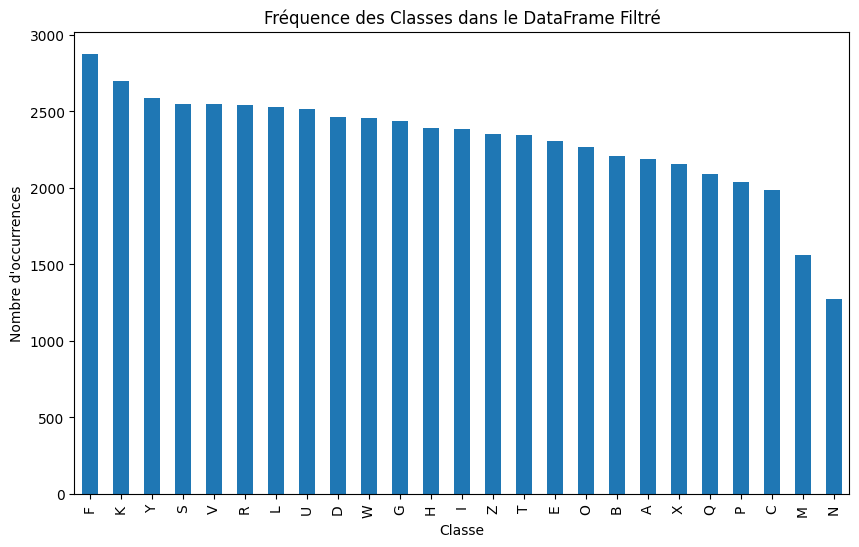

In [25]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [26]:
seuil_bas = 0
seuil_haut = 1250

classes_to_keep = class_counts_filtered[class_counts_filtered >= seuil_bas].index
df_filtered = pd.DataFrame(columns=df.columns)
for classe in classes_to_keep:
    df_classe = df[df['label'] == classe]
    if len(df_classe) > seuil_haut:
        df_classe = df_classe.head(seuil_haut)
    df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)
df = df_filtered

/tmp/ipykernel_68626/1023081681.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)


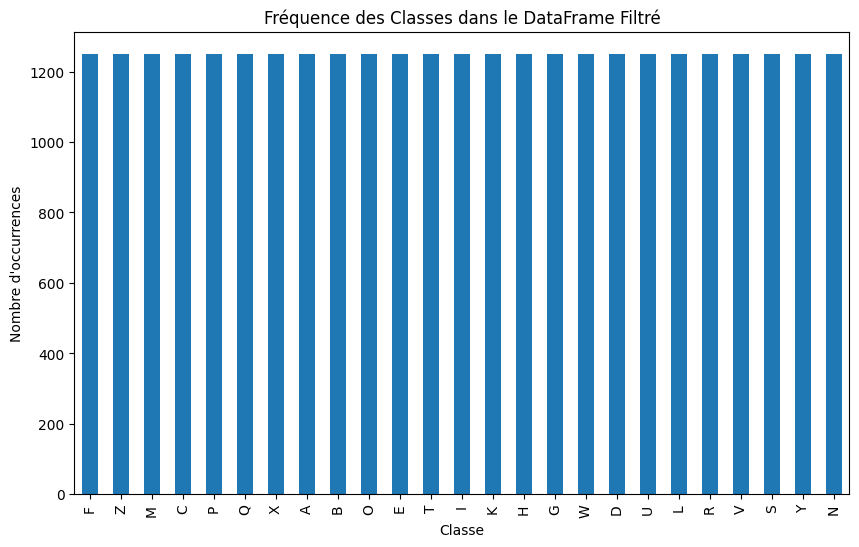

In [27]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [28]:
df.head()

,label,keypoints,angles,distances,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
0,F,"[(0.7516232132911682, 0.8792057633399963), (0....","[-16.124394471598006, -24.904486210158705, -33...","[0.08966696894890444, 0.17498258296040334, 0.2...",0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,0.476828,0.673128,0.519815
1,F,"[(0.7084242105484009, 1.0198203325271606), (0....","[-42.768739922843096, -55.06845458147023, -63....","[0.11366325127699141, 0.23057101180193634, 0.3...",0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,0.424030,0.332256,0.627813
2,F,"[(0.7344133853912354, 0.7317389845848083), (0....","[-19.834276406134737, -37.81753028969262, -48....","[0.05785239346021678, 0.11791001326788055, 0.1...",0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,0.453148,0.598558,0.499567
3,F,"[(0.5940902829170227, 0.8325281739234924), (0....","[-48.124551454064296, -54.424734732810116, -63...","[0.1538874956967051, 0.27941615936365277, 0.37...",0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,0.215822,0.292852,0.367216
4,F,"[(0.41573643684387207, 0.9189311265945435), (0...","[-40.90534153350599, -49.738615945333805, -62....","[0.12242954577650023, 0.2475979806488168, 0.32...",0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,0.362336,0.173003,0.510902


In [29]:
df.describe()

,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
count,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000
mean,0.535925,0.706378,0.593270,0.505689,0.580299,0.389857,0.546654,0.454277,0.523723,0.532586,0.474878,0.532844
std,0.179754,0.174020,0.194281,0.170156,0.201395,0.197496,0.177794,0.216364,0.171650,0.193597,0.184535,0.193074
min,0.011036,-0.035737,0.014767,0.039824,-0.009725,-0.025555,-0.009658,-0.021212,0.010347,-0.018493,-0.052407,-0.013781
25%,0.404680,0.591031,0.450624,0.384323,0.446010,0.229395,0.417339,0.280136,0.396689,0.397585,0.337075,0.390603
50%,0.532310,0.726968,0.601227,0.502488,0.598723,0.375133,0.551643,0.449173,0.521659,0.546605,0.472632,0.548882
75%,0.669577,0.845070,0.744217,0.627419,0.732974,0.522570,0.683129,0.624289,0.655303,0.682546,0.615068,0.684712
max,1.099166,1.098499,1.082753,1.092028,1.098787,1.243939,1.106112,1.290987,1.104987,1.300647,1.095235,1.226691


In [30]:
angle_columns = df['angles'].apply(pd.Series)
distance_columns = df['distances'].apply(pd.Series)

# Renommage des colonnes
angle_columns.columns = [f'angle_{i}' for i in angle_columns.columns]
distance_columns.columns = [f'dist_{i}' for i in distance_columns.columns]

# Concaténation des nouvelles colonnes de angles et distances au DataFrame original
# Ici, on peut choisir de retirer les colonnes originales 'angles' et 'distances', ou de les laisser
df = pd.concat([df.drop(['angles', 'distances', 'keypoints'], axis=1), angle_columns, distance_columns], axis=1)
df.head()

,label,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,...,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28
0,F,0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,...,0.367863,0.032573,0.117832,0.137144,0.150991,0.298694,0.126584,0.343063,0.132421,0.259295
1,F,0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,...,0.543297,0.035373,0.214629,0.238250,0.240778,0.458651,0.214515,0.534037,0.234230,0.451741
2,F,0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,...,0.268999,0.037399,0.066014,0.068277,0.132740,0.222461,0.110105,0.258734,0.102742,0.163929
3,F,0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,...,0.554311,0.021714,0.196650,0.168952,0.212326,0.418790,0.170603,0.461844,0.217370,0.360293
4,F,0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,...,0.474770,0.016807,0.217040,0.152702,0.176215,0.303679,0.098795,0.354910,0.221639,0.322531


In [31]:
X = df.drop(columns=['label'])
y = df['label']

In [32]:
X.head()

,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,...,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28
0,0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,0.476828,...,0.367863,0.032573,0.117832,0.137144,0.150991,0.298694,0.126584,0.343063,0.132421,0.259295
1,0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,0.424030,...,0.543297,0.035373,0.214629,0.238250,0.240778,0.458651,0.214515,0.534037,0.234230,0.451741
2,0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,0.453148,...,0.268999,0.037399,0.066014,0.068277,0.132740,0.222461,0.110105,0.258734,0.102742,0.163929
3,0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,0.215822,...,0.554311,0.021714,0.196650,0.168952,0.212326,0.418790,0.170603,0.461844,0.217370,0.360293
4,0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,0.362336,...,0.474770,0.016807,0.217040,0.152702,0.176215,0.303679,0.098795,0.354910,0.221639,0.322531


In [33]:
X.shape, y.shape

((31250, 61), (31250,))

In [34]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import xgboost as xgb

import joblib

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5) 
    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

/home/mathieu/Dev/project/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mathieu/Dev/project/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model: LogisticRegression
Cross-validation scores: [0.847  0.8552 0.8562 0.8504 0.8522]
Mean score: 0.8522000000000001
Standard deviation: 0.003325056390499251
Model: DecisionTreeClassifier
Cross-validation scores: [0.9604 0.965  0.959  0.9646 0.9666]
Mean score: 0.96312
Standard deviation: 0.002905443167573586
Model: RandomForestClassifier
Cross-validation scores: [0.9876 0.9874 0.9898 0.9894 0.9866]
Mean score: 0.98816
Standard deviation: 0.0012289833196589518
Model: SVC
Cross-validation scores: [0.8838 0.8792 0.882  0.8752 0.8766]
Mean score: 0.8793599999999999
Standard deviation: 0.003213471642943197
Model: KNeighborsClassifier
Cross-validation scores: [0.959  0.9622 0.9616 0.9608 0.9572]
Mean score: 0.9601599999999999
Standard deviation: 0.0018304097901836094


In [37]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

scores = cross_val_score(model_xgb, X_train, y_train_encoded, cv=5)

print(f"Model: {type(model_xgb).__name__}")
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Model: XGBClassifier
Cross-validation scores: [0.983  0.9874 0.985  0.9882 0.9864]
Mean score: 0.986
Standard deviation: 0.0018417383093154232


In [ ]:
# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Create an instance of the XGBClassifier model
# model = xgb.XGBClassifier()

# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train_encoded)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [39]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

param_grid = {
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

model_xgb.set_params(**param_grid)
model_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
y_pred = model_xgb.predict(X_test)
report = classification_report(y_test_encoded, y_pred)
cm = confusion_matrix(y_test_encoded, y_pred)
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       230
           1       0.98      1.00      0.99       247
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       259
           4       1.00      0.97      0.98       234
           5       0.98      0.99      0.98       225
           6       1.00      1.00      1.00       271
           7       1.00      1.00      1.00       288
           8       0.98      0.97      0.97       254
           9       0.98      1.00      0.99       242
          10       1.00      0.99      0.99       271
          11       0.96      0.98      0.97       256
          12       0.97      0.95      0.96       246
          13       1.00      1.00      1.00       233
          14       0.99      0.99      0.99       258
          15       0.99      0.99      0.99       271
          16       0.98      0.97      0.98       244

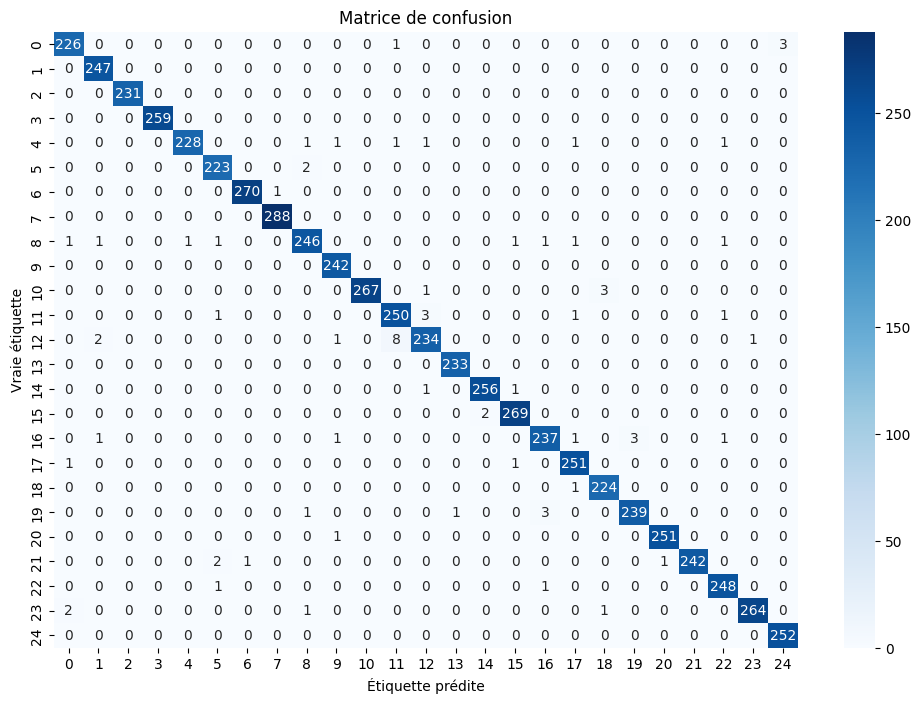

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de confusion')
plt.show()

In [42]:
joblib.dump(model_xgb, 'model_xgb_xyz_angles_dist_xy.pkl')

['model_xgb_xyz_angles_dist_xy.pkl']